<a href="https://colab.research.google.com/github/bhagirathbhard/BA775_Notebook/blob/nightly/Indian_Startup_Funding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **<a id="Content" style="color:#023e8a;">Table of Content</a>**

* [**<span style="color:#023e8a;">1. Project and Dataset Overview</span>**](#Project)
* [**<span style="color:#023e8a;">2. Exploratory Data Analysis</span>**](#EDA)
* [**<span style="color:#023e8a;">4. Questions and Analysis</span>**](#Questions)
* [**<span style="color:#023e8a;">6. Conclusion</span>**](#Conclusion)
* [**<span style="color:#023e8a;">7. References</span>**](#References)


## **<span style="color:#023e8a;font-size:200%"><center>Indian Startup Funding</center></span>**
## **<center><span style="color:#FEF1FE;background-color:#023e8a;border-radius: 5px;padding: 5px">By: Yicheng Jiang, Bhagirath Bhardwaj, Agnes Shih, Paul Seiters, and Siddharth Bookinkere</span></center>**

# **<span id="Project" style="color:#023e8a;">Project and Dataset Overview</span>**

Harold is a very traditional financial money manager from the USA, investing almost exclusively in the US. After the US economy had lost a lot of its growth trajectory and the FED predicted GDP growth to linger below a mere 2% annually, his clients have been running from our investment products. Where are they all going? After booking a tee time with one of our long-time clients, he heard some adolescents with smartphones talking about the start-up scene in India. There were wild tales about startups with valuations beyond $1B, called unicorns. Apparently, there was not a hint of a slowing economy over there. Is it time to go international? After multiple people confirmed the start-up hype in India, he concluded that it is time to get ourselves a snapshot of what is going on in India. Who is investing? Where are they investing? And most importantly, which companies are they investing in? 

As a team, we perform data cleaning, exploratory data analysis, and finally, create a visualization in Tableau. Also, we chose the Indian Startup Funding dataset collected from multiple sources because of the varied types of funding covered, the sizable number of observations, and the time coverage from 2015 until May 2022, including the Covid-19 phase.

1.   [Indian Startup Funding & Investment Chart [2015-2021]](https://trak.in/india-startup-funding-investment-2015/)
2.   [Indian Startups - Funding & Investors Data [2018-2021]](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data)
4.   [Indian Startups - Funding Data [2022]](https://www.kaggle.com/datasets/omkargowda/indian-startups-funding-data-januarymay-2022)
5.   [Funding details of the startups in India](https://www.kaggle.com/datasets/sudalairajkumar/indian-startup-funding)
6.   [Cleaned Dataset from Github only for Funding calculation purpose and Dates](https://github.com/Satyampd/Startups-in-India-EDA/blob/master/dataset.csv)


> In this project 3 datasets created for different purposes; Raw data from Kaggle in India_Funding data cleaning, union, etc. Funding_Calculation created base on Github data source for EDA analysis (AVG,SUBSTRING based on Funding, etc..). Finally Founding_Year created to calculate difference between year of funding and founding year purpose

**Difference among `India_Funding_AllYear`, `Funding_Calculation`, and `Founding_Year`**

| Table Name      | Brief Description | Characteristic, Data type   |
| ----------- | ----------------  | ----------- |
| `India_Funding_AllYear`      |  Most populated table from Kaggle. | Data is inconsistent with investment amounts with mixture of `INR` and `USD` with no programmatic method to resolve |
| `Funding_Calculation`   | Dataset retrieved from Github, with correct investment amount in `USD`.  | Joining `Funding_Calculation` and `India_Funding_AllYear` degraded data quality, hence they were not joined through Union |
| `Founding_Year` | Table Created based on `India_Funding_AllYear` | Calculate the difference between founding year and funding year. |

**I. India_Funding_AllYear Table**

| Column      | Brief Description | Characteristic, Data type   |
| ----------- | ----------------  | ----------- |
| `UUID`      |  Randomly generated using `GENERATE_UUID()` bigquery function      |  String, Unique, Primary Key           |
| `Investors`   | Investor Name, usually an individual or a firm            |  String, multiple-values |
| `Funding_Year` | Year the start up was funded | Date |
| `Company_Brand` | Name of the startup | String, Not null |
| `Headquarter` | Location in City, Province where the startup was founded | String |
| `Stage` | Funding Round stage of the Startup, further described below* | String |
| `What_it_does` | Brief description about start-up | String |
| `USD_Amount` | Amount in USD funded per investment round | String |
| `Total_USD_Amount` | Calculated based on USD_Amount data | Integer (Data from github) |


**II. Funding_Calculation**

| Column      | Brief Description | Characteristic, Data type   |
| ----------- | ----------------  | ----------- |
| `PUID`      |  Randomly generated using `GENERATE_UUID()` bigquery function      |  String, Unique, Primary Key           |
| `Startup Name`   | Name of the startup  | String, Not null |
| `IndustryVertical` | Industry of the business | String |
| `SubVertical` | business lines or sectors | String |
| `Date` | Date the start up was funded | Date  |
| `CityLocation` | Location in City, Province where the startup was founded | String |
| `Investment Type` | Type of the investment for funding rounds (Not cleaned), refer to Investment Stage | String |
| `InvestmentStage` | New Funding Round stage of the Startup,changed based on Investment Type* | String |
| `What_it_does` | Brief description about start-up | String |
| `Amount_USD` | Amount in USD funded per investment round | Integer |
| `AmountInUSD` | Calculated and cleaned based on Amount_USD data | Integer |
| `UUID` | Foreign Key to connect India_Founding_AllYear Table  | String  |
| `UID` | Foreign Key to connect Founding_Year Table  | String  |

**III. Founding_AllYear**

| Column      | Brief Description | Characteristic, Data type   |
| ----------- | ----------------  | ----------- |
| `UID`      |  Combination of Company Name and Founding Year |  String, Unique, Primary Key           |
| `Company Name`   | Name of the startup  | String, Not null |
| `Founding Year` | Year of Company being founded | Integer |
| `Funding_Year` | Year of Company being funded | Integer |
| `Year_Diff` | Calculated base on Founding Year - Funding Year | Integer  |
| `UUID` | Foreign Key to connect India_Founding_AllYear Table | Integer  |
| `UID` | Foreign Key to connect Founding_Year Table  | String  |

**What is an investment stage?**
 
*   Many companies have to complete a number of fundraising rounds before getting to the initial public offering (IPO) stage.
*   These fundraising rounds allow investors to invest money into a growing company in exchange for equity/ownership.
*   The initial investment—also known as seed funding—is followed by various rounds, known as **Series A, B, and C**.
*  A new valuation is done at the time of each funding round.
Valuations are determined by various factors, including market size, company potential, current revenues, and management.

**ERD Diagram**
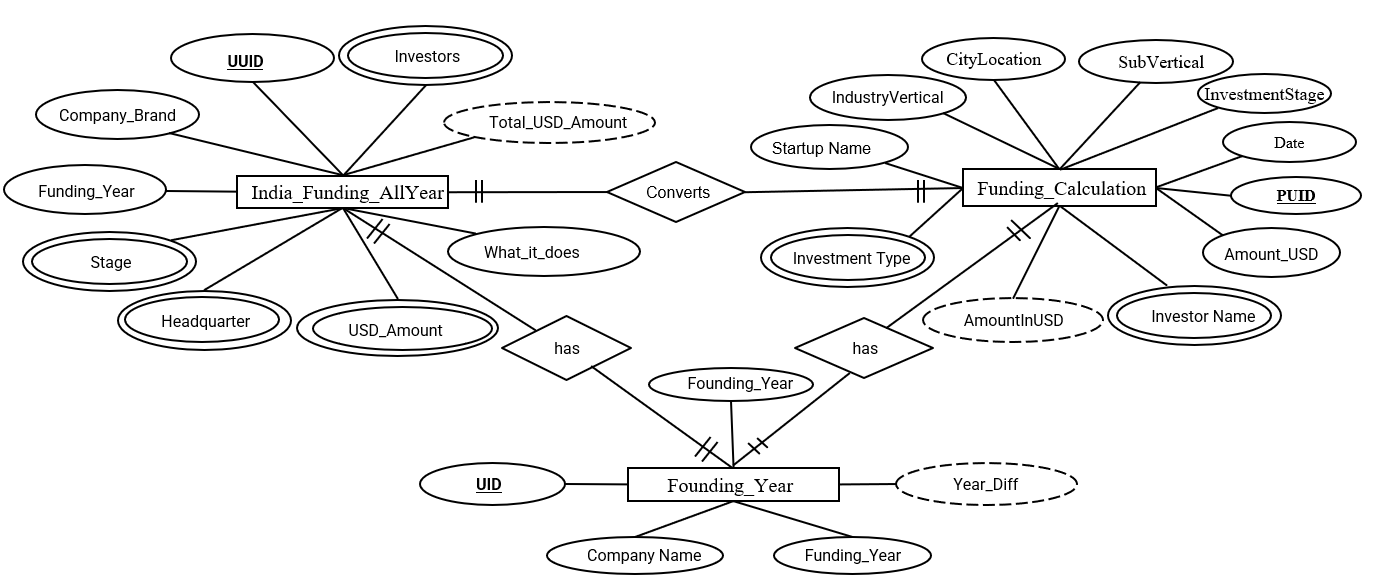

**Data Structure with Primary Keys and Foreign Keys**
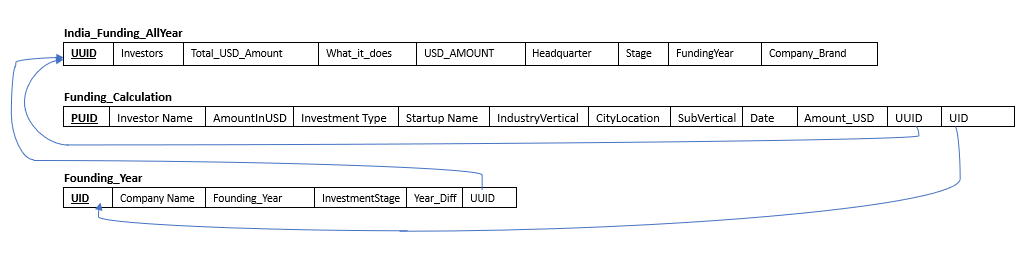

>Above design is in most ideal case, since we pull data from different sourses to fix the data quality issue that exist in `India_Funding_AllYear`; in reality, the `LEFT OUTER JOIN` or `INNER JOIN` did not perform well.

# **<span id="EDA" style="color:#023e8a;">Exploratory Data Analysis (EDA)</span>**

In [ ]:
#Connect to Google Big Query
from google.colab import auth
auth.authenticate_user()

Loading dataset by SQL and presenting criteria check for 5k rows and 8 columns.

In [ ]:
## Performing (Table Union)
%%bigquery --project=ba775-team-project-a01

WITH Indian_Startup AS(
SELECT Funding_Year,Company_Name,Sector,Location As HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2022`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2021`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_is_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2020`
UNION ALL
SELECT Funding_Year,Company AS Company_Brand,Sector,HeadQuarter,Investor,Stage,Amount___ AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2019`
UNION ALL
SELECT Funding_Year,Company_Name AS Company_Brand,Industry as Sector,Location as HeadQuarter,Investor,Round AS Stage,USD_Amount,About_Company as What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2018`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,_Amount AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2017`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2016`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Investment_Type as Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2015`
)

SELECT * FROM `Indian_Startup`;

,Funding_Year,Company_Name,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
0,2019,Nu Genes,AgriTech,Telangana,Innovation in Food and Agriculture (IFA),None,6000000,"It is a seed company engaged in production, pr..."
1,2019,Pumpkart,E-marketplace,Chandigarh,Dinesh Dua,None,Undisclosed,B2B model for appliances and electrical products
2,2019,Smart Institute,Edtech,Surat,HNI investors,None,1500000,A platform to learn online
3,2019,Kratikal,Technology,Uttar pradesh,"Gilda VC, Art Venture, Rajeev Chitrabhanu",Pre-series A,1000000,Provides cyber security solutions
4,2019,Ess Kay Fincorp,Banking,Rajasthan,"TPG, Norwest Venture Partners, Evolvence India",None,33000000,Organised Non-Banking Finance Company
...,...,...,...,...,...,...,...,...
5689,2020,Max wholesale,E-commerce,New Delhi,"Al Falaj Commercial Investment Co, Vistra ITCL...",None,"10,000,000",MaxWholesale is an online distributor that pro...
5690,2020,High Street Essentials,Ecommerce,New Delhi,"SAIF Partners, India Quotient",Pre series C,"4,000,000",The parent company of women's fashion brands F...
5691,2020,Agro2o,Agritech,New Delhi,Mumbai Angels Network,None,"3,400,000",It develops products focused on making hydropo...
5692,2020,Eupheus Learning,Edtech,New Delhi,Yuj Ventures,Series A,"300,000","Provides technology-led, subscription-based le..."


`5694` rows and `8` columns

Generating a `UUID` as the Primary Key (Identifier) for India Funding Table

In [ ]:
%%bigquery --project=ba775-team-project-a01

CREATE OR REPLACE TABLE `ba775-team-project-a01.Indianstartups.India_Funding_AllYear`
AS

SELECT GENERATE_UUID() AS UUID, * 
FROM(
SELECT 
Funding_Year,Company_Name,Sector,Location As HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2022`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2021`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_is_does AS What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2020`
UNION ALL
SELECT Funding_Year,Company AS Company_Brand,Sector,HeadQuarter,Investor,Stage,Amount___ AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2019`
UNION ALL
SELECT Funding_Year,Company_Name AS Company_Brand,Industry as Sector,Location as HeadQuarter,Investor,Round AS Stage,USD_Amount,About_Company as What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2018`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,_Amount AS USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2017`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2016`
UNION ALL
SELECT Funding_Year,Company_Brand,Sector,HeadQuarter,Investor,Investment_Type as Stage,USD_Amount,What_it_does
FROM `ba775-team-project-a01.Indianstartups.India_Funding_2015`
);

""


Show output with the `UUID`

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT * FROM 
`ba775-team-project-a01.Indianstartups.India_Funding_AllYear`
LIMIT 5;

,UUID,Funding_Year,Company_Name,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
0,33faf7fd-8e97-4d20-a2e3-2f8b55e767ac,2015,CredR,Used two-wheeler Marketplace,Mumbai,GrowthStory,Seed Funding,N/A,None
1,c1f62033-89e4-4784-b97e-7ea53cbbb79b,2015,The Home Salon,on-demand home beauty and wellness portal,Mumbai,VentureNursery,Seed Funding,N/A,None
2,2398474d-3f54-4c6f-83c8-fee63be69400,2015,Eazy Coach,Education Marketplace,Kolkata,Ravi Agarwal,Seed Funding,N/A,None
3,d2d94051-fc83-4864-8f07-12cbb78a9138,2015,Springboard,Data Science & UX design Learning platform,Bangalore,"Allen Blue, John Katzman, Naveen Tewari, Karti...",Seed Funding,1700000,None
4,ed987376-0d96-40cb-8f18-c29b1e2f6811,2015,Vidgyor,Video Advertisement Platform,Bangalore,AngelPrime,Seed Funding,500000,None


After viewed though raw dataset in EXCEL, we found that there are issues in HeadQuarter and Investor columns; to further check that all HeadQueater in India states, cities, or districts; in total 116 rows need to be dropped

In [ ]:
%%bigquery --project=ba775-team-project-a01
CREATE OR REPLACE TABLE `ba775-team-project-a01.Indianstartups.DataCleaning01`
AS
SELECT UUID, HeadQuarter
FROM `ba775-team-project-a01.Indianstartups.India_Funding_AllYear`
WHERE HeadQuarter not like '%Mumbai%'
AND HeadQuarter not like '%Delhi%'
AND HeadQuarter NOT LIKE '%Ahmedabad%'
AND HeadQuarter NOT LIKE '%Chennai%'
AND HeadQuarter NOT LIKE '%Kolkata%'
AND HeadQuarter NOT LIKE '%Surat%'
AND HeadQuarter NOT LIKE '%Pune%'
AND HeadQuarter NOT LIKE '%Jaipur%'
AND HeadQuarter NOT LIKE '%Lucknow%'
AND HeadQuarter NOT LIKE '%Kanpur%'
AND HeadQuarter NOT LIKE '%Nagpur%'
AND HeadQuarter NOT LIKE '%Indore%'
AND HeadQuarter NOT LIKE '%Thane%'
AND HeadQuarter NOT LIKE '%Bhopal%'
AND HeadQuarter NOT LIKE '%Visakhapatnam%'
AND HeadQuarter NOT LIKE '%Pimpri and Chinchwad%'
AND HeadQuarter NOT LIKE '%Patna%'
AND HeadQuarter NOT LIKE '%Vadodara%'
AND HeadQuarter NOT LIKE '%Ghaziabad%'
AND HeadQuarter NOT LIKE '%Ludhiana%'
AND HeadQuarter NOT LIKE '%Agra%'
AND HeadQuarter NOT LIKE '%Nashik%'
AND HeadQuarter NOT LIKE '%Faridabad%'
AND HeadQuarter NOT LIKE '%Meerut%'
AND HeadQuarter NOT LIKE '%Rajkot%'
AND HeadQuarter NOT LIKE '%Kalyan and Dombivali%'
AND HeadQuarter NOT LIKE '%Vasai Virar%'
AND HeadQuarter NOT LIKE '%Varanasi%'
AND HeadQuarter NOT LIKE '%Srinagar%'
AND HeadQuarter NOT LIKE '%Aurangabad%'
AND HeadQuarter NOT LIKE '%Dhanbad%'
AND HeadQuarter NOT LIKE '%Amritsar%'
AND HeadQuarter NOT LIKE '%Navi Mumbai%'
AND HeadQuarter NOT LIKE '%Allahabad%'
AND HeadQuarter NOT LIKE '%Haora%'
AND HeadQuarter NOT LIKE '%Ranchi%'
AND HeadQuarter NOT LIKE '%Gwalior%'
AND HeadQuarter NOT LIKE '%Jabalpur%'
AND HeadQuarter NOT LIKE '%Coimbatore%'
AND HeadQuarter NOT LIKE '%Vijayawada%'
AND HeadQuarter NOT LIKE '%Jodhpur%'
AND HeadQuarter NOT LIKE '%Madurai%'
AND HeadQuarter NOT LIKE '%Raipur%'
AND HeadQuarter NOT LIKE '%Kota%'
AND HeadQuarter NOT LIKE '%Chandigarh%'
AND HeadQuarter NOT LIKE '%Guwahati%'
AND HeadQuarter NOT LIKE '%Solapur%'
AND HeadQuarter NOT LIKE '%Hubli and Dharwad%'
AND HeadQuarter NOT LIKE '%Bareilly%'
AND HeadQuarter NOT LIKE '%Mysore%'
AND HeadQuarter NOT LIKE '%Moradabad%'
AND HeadQuarter NOT LIKE '%Gurgaon%'
AND HeadQuarter NOT LIKE '%Aligarh%'
AND HeadQuarter NOT LIKE '%Jalandhar%'
AND HeadQuarter NOT LIKE '%Tiruchirappalli%'
AND HeadQuarter NOT LIKE '%Bhubaneswar%'
AND HeadQuarter NOT LIKE '%Salem%'
AND HeadQuarter NOT LIKE '%Mira and Bhayander%'
AND HeadQuarter NOT LIKE '%Thiruvananthapuram%'
AND HeadQuarter NOT LIKE '%Bhiwandi%'
AND HeadQuarter NOT LIKE '%Saharanpur%'
AND HeadQuarter NOT LIKE '%Gorakhpur%'
AND HeadQuarter NOT LIKE '%Guntur%'
AND HeadQuarter NOT LIKE '%Amravati%'
AND HeadQuarter NOT LIKE '%Bikaner%'
AND HeadQuarter NOT LIKE '%Noida%'
AND HeadQuarter NOT LIKE '%Jamshedpur%'
AND HeadQuarter NOT LIKE '%Bhilai Nagar%'
AND HeadQuarter NOT LIKE '%Warangal%'
AND HeadQuarter NOT LIKE '%Cuttack%'
AND HeadQuarter NOT LIKE '%Firozabad%'
AND HeadQuarter NOT LIKE '%Kochi%'
AND HeadQuarter NOT LIKE '%Bhavnagar%'
AND HeadQuarter NOT LIKE '%Dehradun%'
AND HeadQuarter NOT LIKE '%Durgapur%'
AND HeadQuarter NOT LIKE '%Asansol%'
AND HeadQuarter NOT LIKE '%Nanded Waghala%'
AND HeadQuarter NOT LIKE '%Kolapur%'
AND HeadQuarter NOT LIKE '%Ajmer%'
AND HeadQuarter NOT LIKE '%Gulbarga%'
AND HeadQuarter NOT LIKE '%Loni%'
AND HeadQuarter NOT LIKE '%Ujjain%'
AND HeadQuarter NOT LIKE '%Siliguri%'
AND HeadQuarter NOT LIKE '%Ulhasnagar%'
AND HeadQuarter NOT LIKE '%Jhansi%'
AND HeadQuarter NOT LIKE '%Sangli Miraj Kupwad%'
AND HeadQuarter NOT LIKE '%Jammu%'
AND HeadQuarter NOT LIKE '%Nellore%'
AND HeadQuarter NOT LIKE '%Mangalore%'
AND HeadQuarter NOT LIKE '%Belgaum%'
AND HeadQuarter NOT LIKE '%Jamnagar%'
AND HeadQuarter NOT LIKE '%Tirunelveli%'
AND HeadQuarter NOT LIKE '%Malegaon%'
AND HeadQuarter NOT LIKE '%Gaya%'
AND HeadQuarter NOT LIKE '%Ambattur%'
AND HeadQuarter NOT LIKE '%Jalgaon%'
AND HeadQuarter NOT LIKE '%Udaipur%'
AND HeadQuarter NOT LIKE '%Maheshtala%'
AND HeadQuarter NOT LIKE '%Tiruppur%'
AND HeadQuarter NOT LIKE '%Davanagere%'
AND HeadQuarter NOT LIKE '%Kozhikode%'
AND HeadQuarter NOT LIKE '%Kurnool%'
AND HeadQuarter NOT LIKE '%Akola%'
AND HeadQuarter NOT LIKE '%Rajpur Sonarpur%'
AND HeadQuarter NOT LIKE '%Bokaro Steel%'
AND HeadQuarter NOT LIKE '%Bellary%'
AND HeadQuarter NOT LIKE '%Patiala%'
AND HeadQuarter NOT LIKE '%South Dum Dum%'
AND HeadQuarter NOT LIKE '%Rajarhat Gopalpur%'
AND HeadQuarter NOT LIKE '%Bhagalpur%'
AND HeadQuarter NOT LIKE '%Agartala%'
AND HeadQuarter NOT LIKE '%Muzaffarnagar%'
AND HeadQuarter NOT LIKE '%Bhatpara%'
AND HeadQuarter NOT LIKE '%Latur%'
AND HeadQuarter NOT LIKE '%Panihati%'
AND HeadQuarter NOT LIKE '%Dhule%'
AND HeadQuarter NOT LIKE '%Rohtak%'
AND HeadQuarter NOT LIKE '%Korba%'
AND HeadQuarter NOT LIKE '%Bhilwara%'
AND HeadQuarter NOT LIKE '%Brahmapur Town%'
AND HeadQuarter NOT LIKE '%Muzaffarpur%'
AND HeadQuarter NOT LIKE '%Ahmadnagar%'
AND HeadQuarter NOT LIKE '%Mathura%'
AND HeadQuarter NOT LIKE '%Kollam%'
AND HeadQuarter NOT LIKE '%Avadi%'
AND HeadQuarter NOT LIKE '%Kadapa%'
AND HeadQuarter NOT LIKE '%Rajahmundry%'
AND HeadQuarter NOT LIKE '%Bilaspur%'
AND HeadQuarter NOT LIKE '%Kamarhati%'
AND HeadQuarter NOT LIKE '%Shahjahanpur%'
AND HeadQuarter NOT LIKE '%Bijapur%'
AND HeadQuarter NOT LIKE '%Rampur%'
AND HeadQuarter NOT LIKE '%Shimoga%'
AND HeadQuarter NOT LIKE '%Chandrapur%'
AND HeadQuarter NOT LIKE '%Junagadh%'
AND HeadQuarter NOT LIKE '%Thrissur%'
AND HeadQuarter NOT LIKE '%Alwar%'
AND HeadQuarter NOT LIKE '%Barddhaman%'
AND HeadQuarter NOT LIKE '%Kulti%'
AND HeadQuarter NOT LIKE '%Kakinada%'
AND HeadQuarter NOT LIKE '%Nizamabad%'
AND HeadQuarter NOT LIKE '%Parbhani%'
AND HeadQuarter NOT LIKE '%Tumkur%'
AND HeadQuarter NOT LIKE '%Hisar%'
AND HeadQuarter NOT LIKE '%Ozhukarai%'
AND HeadQuarter NOT LIKE '%Biharsharif%'
AND HeadQuarter NOT LIKE '%Darbhanga%'
AND HeadQuarter NOT LIKE '%Panipat%'
AND HeadQuarter NOT LIKE '%Aizawl%'
AND HeadQuarter NOT LIKE '%Bally%'
AND HeadQuarter NOT LIKE '%Dewas%'
AND HeadQuarter NOT LIKE '%Tirupati%'
AND HeadQuarter NOT LIKE '%Ichalkaranji%'
AND HeadQuarter NOT LIKE '%Karnal%'
AND HeadQuarter NOT LIKE '%Bathinda%'
AND HeadQuarter NOT LIKE '%Jalna%'
AND HeadQuarter NOT LIKE '%Kirari Suleman Nagar%'
AND HeadQuarter NOT LIKE '%Purnia%'
AND HeadQuarter NOT LIKE '%Satna%'
AND HeadQuarter NOT LIKE '%Maunath Bhanjan%'
AND HeadQuarter NOT LIKE '%Barasat%'
AND HeadQuarter NOT LIKE '%Sonipat%'
AND HeadQuarter NOT LIKE '%Farrukhabad and Fatehgarh%'
AND HeadQuarter NOT LIKE '%Sagar%'
AND HeadQuarter NOT LIKE '%Raurkela%'
AND HeadQuarter NOT LIKE '%Durg%'
AND HeadQuarter NOT LIKE '%Imphal%'
AND HeadQuarter NOT LIKE '%Ratlam%'
AND HeadQuarter NOT LIKE '%Hapur%'
AND HeadQuarter NOT LIKE '%Arrah%'
AND HeadQuarter NOT LIKE '%Karimnagar%'
AND HeadQuarter NOT LIKE '%Anantapur%'
AND HeadQuarter NOT LIKE '%NDMC%'
AND HeadQuarter NOT LIKE '%Etawah%'
AND HeadQuarter NOT LIKE '%Ambernath%'
AND HeadQuarter NOT LIKE '%Bharatpur%'
AND HeadQuarter NOT LIKE '%Begusarai%'
AND HeadQuarter NOT LIKE '%Tiruvottiyur%'
AND HeadQuarter NOT LIKE '%North Dum Dum%'
AND HeadQuarter NOT LIKE '%Gandhidham%'
AND HeadQuarter NOT LIKE '%Baranagar%'
AND HeadQuarter NOT LIKE '%Puducherry%'
AND HeadQuarter NOT LIKE '%Thoothukkudi%'
AND HeadQuarter NOT LIKE '%Sikar%'
AND HeadQuarter NOT LIKE '%Rewa%'
AND HeadQuarter NOT LIKE '%Mirzapur and Vindhyachal%'
AND HeadQuarter NOT LIKE '%Raichur%'
AND HeadQuarter NOT LIKE '%Pali%'
AND HeadQuarter NOT LIKE '%Ramagundam%'
AND HeadQuarter NOT LIKE '%Hardwar%'
AND HeadQuarter NOT LIKE '%Vizianagaram%'
AND HeadQuarter NOT LIKE '%Katihar%'
AND HeadQuarter NOT LIKE '%Nagercoil%'
AND HeadQuarter NOT LIKE '%Ganganagar%'
AND HeadQuarter NOT LIKE '%Karawal Nagar%'
AND HeadQuarter NOT LIKE '%Mango%'
AND HeadQuarter NOT LIKE '%Thanjavur%'
AND HeadQuarter NOT LIKE '%Bulandshahr%'
AND HeadQuarter NOT LIKE '%Uluberia%'
AND HeadQuarter NOT LIKE '%Murwara%'
AND HeadQuarter NOT LIKE '%Sambhal%'
AND HeadQuarter NOT LIKE '%Singrauli%'
AND HeadQuarter NOT LIKE '%Nadiad%'
AND HeadQuarter NOT LIKE '%Secunderabad%'
AND HeadQuarter NOT LIKE '%Naihati%'
AND HeadQuarter NOT LIKE '%Yamunanagar%'
AND HeadQuarter NOT LIKE '%Bidhan Nagar%'
AND HeadQuarter NOT LIKE '%Pallavaram%'
AND HeadQuarter NOT LIKE '%Bidar%'
AND HeadQuarter NOT LIKE '%Munger%'
AND HeadQuarter NOT LIKE '%Panchkula%'
AND HeadQuarter NOT LIKE '%Burhanpur%'
AND HeadQuarter NOT LIKE '%Raurkela Industrial Township%'
AND HeadQuarter NOT LIKE '%Kharagpur%'
AND HeadQuarter NOT LIKE '%Dindigul%'
AND HeadQuarter NOT LIKE '%Hospet%'
AND HeadQuarter NOT LIKE '%Gandhinagar%'
AND HeadQuarter NOT LIKE '%Nangloi Jat%'
AND HeadQuarter NOT LIKE '%English Bazar%'
AND HeadQuarter NOT LIKE '%Ongole%'
AND HeadQuarter NOT LIKE '%Eluru%'
AND HeadQuarter NOT LIKE '%Deoghar%'
AND HeadQuarter NOT LIKE '%Chapra%'
AND HeadQuarter NOT LIKE '%Haldia%'
AND HeadQuarter NOT LIKE '%Khandwa%'
AND HeadQuarter NOT LIKE '%Puri Town%'
AND HeadQuarter NOT LIKE '%Nandyal%'
AND HeadQuarter NOT LIKE '%Morena%'
AND HeadQuarter NOT LIKE '%Amroha%'
AND HeadQuarter NOT LIKE '%Anand%'
AND HeadQuarter NOT LIKE '%Bhind%'
AND HeadQuarter NOT LIKE '%Bhalswa Jahangir Pur%'
AND HeadQuarter NOT LIKE '%Madhyamgram%'
AND HeadQuarter NOT LIKE '%Bhiwani%'
AND HeadQuarter NOT LIKE '%Navi Mumbai Panvel Raigad%'
AND HeadQuarter NOT LIKE '%Baharampur%'
AND HeadQuarter NOT LIKE '%Ambala%'
AND HeadQuarter NOT LIKE '%Morvi%'
AND HeadQuarter NOT LIKE '%Fatehpur%'
AND HeadQuarter NOT LIKE '%Rae Bareli%'
AND HeadQuarter NOT LIKE '%Khora%'
AND HeadQuarter NOT LIKE '%Bhusawal%'
AND HeadQuarter NOT LIKE '%Orai%'
AND HeadQuarter NOT LIKE '%Bahraich%'
AND HeadQuarter NOT LIKE '%Vellore%'
AND HeadQuarter NOT LIKE '%Mahesana%'
AND HeadQuarter NOT LIKE '%Khammam%'
AND HeadQuarter NOT LIKE '%Sambalpur%'
AND HeadQuarter NOT LIKE '%Raiganj%'
AND HeadQuarter NOT LIKE '%Sirsa%'
AND HeadQuarter NOT LIKE '%Dinapur Nizamat%'
AND HeadQuarter NOT LIKE '%Serampore%'
AND HeadQuarter NOT LIKE '%Sultan Pur Majra%'
AND HeadQuarter NOT LIKE '%Guna%'
AND HeadQuarter NOT LIKE '%Jaunpur%'
AND HeadQuarter NOT LIKE '%Panvel%'
AND HeadQuarter NOT LIKE '%Shivpuri%'
AND HeadQuarter NOT LIKE '%Surendranagar Dudhrej%'
AND HeadQuarter NOT LIKE '%Unnao%'
AND HeadQuarter NOT LIKE '%Hugli and Chinsurah%'
AND HeadQuarter NOT LIKE '%Sitapur%'
AND HeadQuarter NOT LIKE '%Hastsal%'
AND HeadQuarter NOT LIKE '%Tambaram%'
AND HeadQuarter NOT LIKE '%Adityapur%'
AND HeadQuarter NOT LIKE '%Badalapur%'
AND HeadQuarter NOT LIKE '%Alappuzha%'
AND HeadQuarter NOT LIKE '%Cuddalore%'
AND HeadQuarter NOT LIKE '%Silchar%'
AND HeadQuarter NOT LIKE '%Gadag and Betigeri%'
AND HeadQuarter NOT LIKE '%Bahadurgarh%'
AND HeadQuarter NOT LIKE '%Machilipatnam%'
AND HeadQuarter NOT LIKE '%Shimla%'
AND HeadQuarter NOT LIKE '%Medinipur%'
AND HeadQuarter NOT LIKE '%Deoli%'
AND HeadQuarter NOT LIKE '%Bharuch%'
AND HeadQuarter NOT LIKE '%Hoshiarpur%'
AND HeadQuarter NOT LIKE '%Jind%'
AND HeadQuarter NOT LIKE '%Chandannagar%'
AND HeadQuarter NOT LIKE '%Adoni%'
AND HeadQuarter NOT LIKE '%Tonk%'
AND HeadQuarter NOT LIKE '%Faizabad%'
AND HeadQuarter NOT LIKE '%Tenali%'
AND HeadQuarter NOT LIKE '%Alandur%'
AND HeadQuarter NOT LIKE '%Kancheepuram%'
AND HeadQuarter NOT LIKE '%Vapi%'
AND HeadQuarter NOT LIKE '%Rajnandgaon%'
AND HeadQuarter NOT LIKE '%Proddatur%'
AND HeadQuarter NOT LIKE '%Navsari%'
AND HeadQuarter NOT LIKE '%Budaun%'
AND HeadQuarter NOT LIKE '%Uttarpara Kotrung%'
AND HeadQuarter NOT LIKE '%Mahbubnagar%'
AND HeadQuarter NOT LIKE '%Erode%'
AND HeadQuarter NOT LIKE '%Batala%'
AND HeadQuarter NOT LIKE '%Saharsa%'
AND HeadQuarter NOT LIKE '%Haldwani and Kathgodam%'
AND HeadQuarter NOT LIKE '%Vidisha%'
AND HeadQuarter NOT LIKE '%Thanesar%'
AND HeadQuarter NOT LIKE '%Kishangarh%'
AND HeadQuarter NOT LIKE '%Dallo Pura%'
AND HeadQuarter NOT LIKE '%Veraval%'
AND HeadQuarter NOT LIKE '%Banda%'
AND HeadQuarter NOT LIKE '%Chittoor%'
AND HeadQuarter NOT LIKE '%Krishnanagar%'
AND HeadQuarter NOT LIKE '%Barrackpur%'
AND HeadQuarter NOT LIKE '%Lakhimpur%'
AND HeadQuarter NOT LIKE '%Santipur%'
AND HeadQuarter NOT LIKE '%Porbandar%'
AND HeadQuarter NOT LIKE '%Hindupur%'
AND HeadQuarter NOT LIKE '%Balurghat%'
AND HeadQuarter NOT LIKE '%Bhadravati%'
AND HeadQuarter NOT LIKE '%Hanumangarh%'
AND HeadQuarter NOT LIKE '%Moga%'
AND HeadQuarter NOT LIKE '%Pathankot%'
AND HeadQuarter NOT LIKE '%Hajipur%'
AND HeadQuarter NOT LIKE '%Sasaram%'
AND HeadQuarter NOT LIKE '%Habra%'
AND HeadQuarter NOT LIKE '%Bid%'
AND HeadQuarter NOT LIKE '%Mohali%'
AND HeadQuarter NOT LIKE '%Burari%'
AND HeadQuarter NOT LIKE '%Beawar%'
AND HeadQuarter NOT LIKE '%Abohar%'
AND HeadQuarter NOT LIKE '%Tiruvannamalai%'
AND HeadQuarter NOT LIKE '%Jamuria%'
AND HeadQuarter NOT LIKE '%Kaithal%'
AND HeadQuarter NOT LIKE '%Godhra%'
AND HeadQuarter NOT LIKE '%Bhuj%'
AND HeadQuarter NOT LIKE '%Robertson Pet%'
AND HeadQuarter NOT LIKE '%Shillong%'
AND HeadQuarter NOT LIKE '%Rewari%'
AND HeadQuarter NOT LIKE '%Hazaribag%'
AND HeadQuarter NOT LIKE '%Bhimavaram%'
AND HeadQuarter NOT LIKE '%Mandsaur%'
AND HeadQuarter NOT LIKE '%Chas%'
AND HeadQuarter NOT LIKE '%Rudrapur%'
AND HeadQuarter NOT LIKE '%Chitradurga%'
AND HeadQuarter NOT LIKE '%Kumbakonam%'
AND HeadQuarter NOT LIKE '%Dibrugarh%'
AND HeadQuarter NOT LIKE '%Kolar%'
AND HeadQuarter NOT LIKE '%Chhindwara%'
AND HeadQuarter NOT LIKE '%Bankura%'
AND HeadQuarter NOT LIKE '%Mandya%'
AND HeadQuarter NOT LIKE '%Dehri%'
AND HeadQuarter NOT LIKE '%Raigarh%'
AND HeadQuarter NOT LIKE '%Madanapalle%'
AND HeadQuarter NOT LIKE '%Nalgonda%'
AND HeadQuarter NOT LIKE '%Hathras%'
AND HeadQuarter NOT LIKE '%Malerkotla%'
AND HeadQuarter NOT LIKE '%Siwan%'
AND HeadQuarter NOT LIKE '%Chhattarpur%'
AND HeadQuarter NOT LIKE '%Hassan%'
AND HeadQuarter NOT LIKE '%Lalitpur%'
AND HeadQuarter NOT LIKE '%Gondiya%'
AND HeadQuarter NOT LIKE '%North Barrackpur%'
AND HeadQuarter NOT LIKE '%Bettiah%'
AND HeadQuarter NOT LIKE '%Palakkad%'
AND HeadQuarter NOT LIKE '%Rajapalayam%'
AND HeadQuarter NOT LIKE '%Botad%'
AND HeadQuarter NOT LIKE '%Modinagar%'
AND HeadQuarter NOT LIKE '%Deoria%'
AND HeadQuarter NOT LIKE '%Raniganj%'
AND HeadQuarter NOT LIKE '%Palwal%'
AND HeadQuarter NOT LIKE '%Khanna%'
AND HeadQuarter NOT LIKE '%Neemuch%'
AND HeadQuarter NOT LIKE '%Pilibhit%'
AND HeadQuarter NOT LIKE '%Mustafabad%'
AND HeadQuarter NOT LIKE '%Hardoi%'
AND HeadQuarter NOT LIKE '%Guntakal%'
AND HeadQuarter NOT LIKE '%Pithampur%'
AND HeadQuarter NOT LIKE '%Motihari%'
AND HeadQuarter NOT LIKE '%Dhaulpur%'
AND HeadQuarter NOT LIKE '%Srikakulam%'
AND HeadQuarter NOT LIKE '%Nabadwip%'
AND HeadQuarter NOT LIKE '%Patan%'
AND HeadQuarter NOT LIKE '%Jagdalpur%'
AND HeadQuarter NOT LIKE '%Udupi%'
AND HeadQuarter NOT LIKE '%Basirhat%'
AND HeadQuarter NOT LIKE '%Damoh%'
AND HeadQuarter NOT LIKE '%Halisahar%'
AND HeadQuarter NOT LIKE '%Jagadhri%'
AND HeadQuarter NOT LIKE '%Rishra%'
AND HeadQuarter NOT LIKE '%Kurichi%'
AND HeadQuarter NOT LIKE '%Dimapur%'
AND HeadQuarter NOT LIKE '%Palanpur%'
AND HeadQuarter NOT LIKE '%Dharmavaram%'
AND HeadQuarter NOT LIKE '%Gokal Pur%'
AND HeadQuarter NOT LIKE '%Kashipur%'
AND HeadQuarter NOT LIKE '%Ashokenagar Kalyangarh%'
AND HeadQuarter NOT LIKE '%Baidyabati%'
AND HeadQuarter NOT LIKE '%Sawai Madhopur%'
AND HeadQuarter NOT LIKE '%Puruliya%'
AND HeadQuarter NOT LIKE '%Mandoli%'
AND HeadQuarter NOT LIKE '%Mainpuri%'
AND HeadQuarter NOT LIKE '%Kanchrapara%'
AND HeadQuarter NOT LIKE '%Satara%'
AND HeadQuarter NOT LIKE '%Churu%'
AND HeadQuarter NOT LIKE '%Madavaram%'
AND HeadQuarter NOT LIKE '%Gangapur%'
AND HeadQuarter NOT LIKE '%Dabgram%'
AND HeadQuarter NOT LIKE '%Darjiling%'
AND HeadQuarter NOT LIKE '%Barshi%'
AND HeadQuarter NOT LIKE '%Etah%'
AND HeadQuarter NOT LIKE '%Jhunjhunun%'
AND HeadQuarter NOT LIKE '%Chikmagalur%'
AND HeadQuarter NOT LIKE '%Jetpur Navagadh%'
AND HeadQuarter NOT LIKE '%Roorkee%'
AND HeadQuarter NOT LIKE '%Gudivada%'
AND HeadQuarter NOT LIKE '%Baleshwar%'
AND HeadQuarter NOT LIKE '%Baran%'
AND HeadQuarter NOT LIKE '%Hoshangabad%'
AND HeadQuarter NOT LIKE '%Nagaon%'
AND HeadQuarter NOT LIKE '%Pudukkottai%'
AND HeadQuarter NOT LIKE '%Adilabad%'
AND HeadQuarter NOT LIKE '%Hosur%'
AND HeadQuarter NOT LIKE '%Muktsar%'
AND HeadQuarter NOT LIKE '%Yavatmal%'
AND HeadQuarter NOT LIKE '%Titagarh%'
AND HeadQuarter NOT LIKE '%Barnala%'
AND HeadQuarter NOT LIKE '%Chittaurgarh%'
AND HeadQuarter NOT LIKE '%Narasaraopet%'
AND HeadQuarter NOT LIKE '%Dum Dum%'
AND HeadQuarter NOT LIKE '%Basti%'
AND HeadQuarter NOT LIKE '%Valsad%'
AND HeadQuarter NOT LIKE '%Ambur%'
AND HeadQuarter NOT LIKE '%Giridih%'
AND HeadQuarter NOT LIKE '%Chandausi%'
AND HeadQuarter NOT LIKE '%Gonda%'
AND HeadQuarter NOT LIKE '%Bally Town%'
AND HeadQuarter NOT LIKE '%Kalol%'
AND HeadQuarter NOT LIKE '%Bagaha%'
AND HeadQuarter NOT LIKE '%Ambikapur%'
AND HeadQuarter NOT LIKE '%Achalpur%'
AND HeadQuarter NOT LIKE '%Gondal%'
AND HeadQuarter NOT LIKE '%Bagalkot%'
AND HeadQuarter NOT LIKE '%Osmanabad%'
AND HeadQuarter NOT LIKE '%Akbarpur%'
AND HeadQuarter NOT LIKE '%Champdani%'
AND HeadQuarter NOT LIKE '%Deesa%'
AND HeadQuarter NOT LIKE '%Khurja%'
AND HeadQuarter NOT LIKE '%Nandurbar%'
AND HeadQuarter NOT LIKE '%Azamgarh%'
AND HeadQuarter NOT LIKE '%Ghazipur%'
AND HeadQuarter NOT LIKE '%Delhi Cantonment%'
AND HeadQuarter NOT LIKE '%Firozpur%'
AND HeadQuarter NOT LIKE '%Baripada%'
AND HeadQuarter NOT LIKE '%Mughalsarai%'
AND HeadQuarter NOT LIKE '%Anantnag%'
AND HeadQuarter NOT LIKE '%Sehore%'
AND HeadQuarter NOT LIKE '%Bongaon%'
AND HeadQuarter NOT LIKE '%Kanpur Cantonment%'
AND HeadQuarter NOT LIKE '%Khardaha%'
AND HeadQuarter NOT LIKE '%Tadpatri%'
AND HeadQuarter NOT LIKE '%Port Blair%'
AND HeadQuarter NOT LIKE '%Sultanpur%'
AND HeadQuarter NOT LIKE '%Bhadrak%'
AND HeadQuarter NOT LIKE '%Shikohabad%'
AND HeadQuarter NOT LIKE '%Jalpaiguri%'
AND HeadQuarter NOT LIKE '%Shamli%'
AND HeadQuarter NOT LIKE '%Karaikkudi%'
AND HeadQuarter NOT LIKE '%Khargone%'
AND HeadQuarter NOT LIKE '%Wardha%'
AND HeadQuarter NOT LIKE '%Ranibennur%'
AND HeadQuarter NOT LIKE '%Kishanganj%'
AND HeadQuarter NOT LIKE '%Neyveli%'
AND HeadQuarter NOT LIKE '%Amreli%'
AND HeadQuarter NOT LIKE '%Suryapet%'
AND HeadQuarter NOT LIKE '%Gangawati%'
AND HeadQuarter NOT LIKE '%Hindaun%'
AND HeadQuarter NOT LIKE '%Jamalpur%'
AND HeadQuarter NOT LIKE '%Bhiwadi%'
AND HeadQuarter NOT LIKE '%Ballia%'
AND HeadQuarter NOT LIKE '%Bansberia%'
AND HeadQuarter NOT LIKE '%Tadepalligudem%'
AND HeadQuarter NOT LIKE '%Miryalaguda%'
AND HeadQuarter NOT LIKE '%Baraut%'
AND HeadQuarter NOT LIKE '%Udgir%'
AND HeadQuarter NOT LIKE '%Betul%'
AND HeadQuarter NOT LIKE '%Bundi%'
AND HeadQuarter NOT LIKE '%Jehanabad%'
AND HeadQuarter NOT LIKE '%Ambala Sadar%'
AND HeadQuarter NOT LIKE '%Nagapattinam%'
AND HeadQuarter NOT LIKE '%Nagaur%'
AND HeadQuarter NOT LIKE '%Buxar%'
AND HeadQuarter NOT LIKE '%Seoni%'
AND HeadQuarter NOT LIKE '%Aurangabad%'
AND HeadQuarter NOT LIKE '%Greater Noida%'
AND HeadQuarter NOT LIKE '%Hinganghat%'
AND HeadQuarter NOT LIKE '%Sujangarh%'
AND HeadQuarter NOT LIKE '%Bhadreswar%'
AND HeadQuarter NOT LIKE '%Chilakaluripet%'
AND HeadQuarter NOT LIKE '%Kasganj%'
AND HeadQuarter NOT LIKE '%Kalyani%'
AND HeadQuarter NOT LIKE '%Gangtok%'
AND HeadQuarter NOT LIKE '%Datia%'
AND HeadQuarter NOT LIKE '%Nagda%'
AND HeadQuarter NOT LIKE '%Banswara%'
AND HeadQuarter NOT LIKE '%Kapurthala%'
AND HeadQuarter NOT LIKE '%Bangalore%'
AND HeadQuarter NOT LIKE '%Hyderabad%'
AND HeadQuarter NOT LIKE '%Gurugram%'
AND HeadQuarter NOT LIKE '%Benglaru%'
AND HeadQuarter NOT LIKE '%Banglore%'
AND HeadQuarter NOT LIKE '%Goa%'
AND HeadQuarter NOT LIKE '%Guindy%'
AND HeadQuarter NOT LIKE "%Bengaluru%"
AND HeadQuarter NOT LIKE "%India%"
AND HeadQuarter NOT LIKE "%Ahmadabad%"
AND HeadQuarter NOT LIKE "%Trivandrum%"
AND HeadQuarter NOT LIKE "%Haryana%"
AND HeadQuarter NOT LIKE "%Kerala%"
AND HeadQuarter NOT LIKE "%Mumba%"
AND HeadQuarter NOT LIKE "%Uttar Pradesh%"
AND HeadQuarter NOT LIKE "%Alleppey%"
AND HeadQuarter NOT LIKE "%Gujarat%"
AND HeadQuarter NOT LIKE "%Telangana%"
AND HeadQuarter NOT LIKE "%Bihar%"
AND HeadQuarter NOT LIKE "%Rajsamand%"
AND HeadQuarter NOT LIKE "%Rajastan%"
AND HeadQuarter NOT LIKE "%Margão%"
AND HeadQuarter NOT LIKE "%Hubli%"
AND HeadQuarter NOT LIKE "%Kormangala%"
AND HeadQuarter NOT LIKE "%Panaji%"
AND HeadQuarter NOT LIKE "%Uttar pradesh%"
AND HeadQuarter NOT LIKE "%Karur%"
AND HeadQuarter NOT LIKE "%New delhi%"
AND HeadQuarter NOT LIKE "%Samsitpur%"
AND HeadQuarter NOT LIKE "%Ernakulam%"
AND HeadQuarter NOT LIKE "%Andheri%"
AND HeadQuarter NOT LIKE "%Tiruchirappall%"
AND HeadQuarter NOT LIKE "%Maharastra%"
AND HeadQuarter NOT LIKE "%Azadpur%"
AND HeadQuarter NOT LIKE "%Mylapore%"
AND HeadQuarter NOT LIKE "%Kalkaji%"
AND HeadQuarter NOT LIKE "%Powai%"
AND HeadQuarter NOT LIKE "%Worli%"
AND HeadQuarter NOT LIKE "%Kannur%"
AND HeadQuarter NOT LIKE "%Kalpakkam%"
AND HeadQuarter NOT LIKE "%Rajasthan%"
AND HeadQuarter NOT LIKE "%Kalpakkam%"
AND HeadQuarter NOT LIKE "%Hyderebad%"
AND HeadQuarter NOT LIKE "%Cochin%"
AND HeadQuarter NOT LIKE "%Odisha%"
AND HeadQuarter NOT LIKE "%Kottayam%"
AND HeadQuarter NOT LIKE "%West Bengal%"

""


Data Quality issue clean up through UUID - delete rows contain UUID showed up in pervious query

In [ ]:
## Dropped 116 rows

%%bigquery --project=ba775-team-project-a01
DELETE FROM `ba775-team-project-a01.Indianstartups.India_Funding_AllYear` 
WHERE UUID IN
(SELECT UUID FROM `ba775-team-project-a01.Indianstartups.DataCleaning01`);

""


116 rows dropped and 5694 rows left over

In [ ]:
## Total 5694 returned after the data drops
%%bigquery --project=ba775-team-project-a01

SELECT COUNT(*) FROM `ba775-team-project-a01.Indianstartups.India_Funding_AllYear`;

,f0_
0,5694


Checking Funding Year for Null Values

In [ ]:
## Check Funding year to be not null

%%bigquery --project=ba775-team-project-a01

SELECT COUNT(Funding_Year) AS null_count
FROM `ba775-team-project-a01.Indianstartups.India_Funding_AllYear` 
WHERE Funding_Year IS NULL;

,null_count
0,0


After visually check the USD_Amount, we find out the USD_Amount values are missing from this data source; also some numbers are unreasonably high. As searched the funding amount on internet, we found cleaned dataset from - https://github.com/Satyampd/Startups-in-India-EDA/blob/master/dataset.csv. (Year from 2015-2020) So we download data in CSV format and upload as the new dataset in india_startups_cleaned with dataset name of ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation and ba775-team-project-a01.indian_startups_cleaned.India_Funding_AllYear. The data table creation process please refering to the Funding Calculation section. Also, we find out the investment round has too many number of categories. So we further narrow the stage categories down to 4 in Funding Calculation Table. Catagorizing Funding Stages, Various overlapping Stages, None, "Series C,D", "Mid-Series" Likely to be consolidated into - Angel, Seed Capital, Early Stage Venture(Series A, B, C), Late Stage Ventue, Private Equity, Distressed, Mezzanine, Private/Public High Yield, Senior LBO Debt.

Even two datasets are same context and values, but the naming of columns are different.Funding_Calucation is used to convert Amount_USD in STRING to INT and new column AmountInUSD created. Then we store the results in to India_Funding_All_Year

## Create Founding Year

In order to analysis the founding year and fund year, we create new table for Founding All Year, set UUID as the foreign key (base on the India_Founding_AllYear Table)

In [ ]:
%%bigquery --project=ba775-team-project-a01

CREATE OR REPLACE TABLE `ba775-team-project-a01.Found_Year_Clearned.FoundingAllYear`
AS
(
-- 2018
SELECT Company_Name,CAST(Funding_Year AS INT64) AS Funding_Year,CAST(Found AS INT64) AS Founding_Year
FROM `ba775-team-project-a01.Found_Year_Clearned.foundingYear_2018`
UNION ALL
-- 2019
SELECT Company AS Company_Name,CAST(Funding_Year AS INT64) AS Funding_Year,CAST(Founded AS INT64) AS Founding_Year
FROM `ba775-team-project-a01.Found_Year_Clearned.foundingYear_2019`
-- 2020
UNION ALL
SELECT Company_Brand AS Company_Name,CAST(Funding_Year AS INT64) AS Funding_Year,CAST(Found AS INT64) AS Founding_Year
FROM `ba775-team-project-a01.Found_Year_Clearned.foundingYear_2020`
-- 2021
UNION ALL
SELECT Company_Brand AS Company_Name,CAST(Funding_Year AS INT64) AS Funding_Year,CAST(Founded AS INT64) AS Founding_Year
FROM `ba775-team-project-a01.Found_Year_Clearned.foundYear_2021`
-- 2022
UNION ALL
SELECT Company_Brand AS Company_Name,CAST(Funding_Year AS INT64) AS Funding_Year,CAST(Founded AS INT64) AS Founding_Year
FROM `ba775-team-project-a01.Found_Year_Clearned.foundYear_2021`
-- 2015
UNION ALL
SELECT Company_Brand AS Company_Name,CAST(Funding_Year AS INT64) AS Funding_Year,CAST(Found AS INT64) AS Founding_Year
FROM `ba775-team-project-a01.Found_Year_Clearned.foundingYear_2015`
-- 2016
UNION ALL
SELECT Company_Brand AS Company_Name,CAST(Funding_Year AS INT64) AS Funding_Year,CAST(Found AS INT64) AS Founding_Year
FROM `ba775-team-project-a01.Found_Year_Clearned.foundingYear_2016`
-- 2017
UNION ALL
SELECT Company_Brand AS Company_Name,CAST(Funding_Year AS INT64) AS Funding_Year,CAST(Found AS INT64) AS Founding_Year
FROM `ba775-team-project-a01.Found_Year_Clearned.foundingYear_2017`
);



""


Created UUID as foreign key, UID as Primary Key

In [ ]:
%%bigquery --project=ba775-team-project-a01

CREATE OR REPLACE TABLE `ba775-team-project-a01.Found_Year_Clearned.FoundingAllYear`
AS

SELECT CONCAT(Company_Name,Funding_Year) AS UID, *, Funding_Year-Founding_Year as Year_Diff
FROM
  (SELECT b.UUID,a.Company_Name,a.Funding_Year,a.Founding_Year
  FROM 
    `ba775-team-project-a01.Found_Year_Clearned.FoundingAllYear` as a, 
    `ba775-team-project-a01.Indianstartups.India_Funding_AllYear` as b
  WHERE 
    a.Company_Name = b.Company_Name
    AND
    a.Funding_Year = b.Funding_Year
    AND
    a.Company_Name is not null) AS calculation
    ;

""


After creating FoundingAllYear table, we want to deleted out the year difference is null, and make sure no duplicates

In [ ]:
%%bigquery --project=ba775-team-project-a01


CREATE OR REPLACE TABLE `ba775-team-project-a01.Found_Year_Clearned.FoundingAllYear`
AS
SELECT DISTINCT(Company_Name),UID,UUID,Funding_Year,Founding_Year,Year_Diff FROM `ba775-team-project-a01.Found_Year_Clearned.FoundingAllYear`
WHERE Year_Diff is not null;

""


In [ ]:
## Data check
%%bigquery --project=ba775-team-project-a01

SELECT * FROM `ba775-team-project-a01.Found_Year_Clearned.FoundingAllYear`

,Company_Name,UID,UUID,Funding_Year,Founding_Year,Year_Diff
0,Seekify,Seekify2019,2dc93306-d03d-4549-ac0a-9ac319db4156,2019,2019,0
1,JobSquare,JobSquare2019,7700d0a8-85a1-4c63-a17f-5ce22ac0453b,2019,2019,0
2,Bijak,Bijak2019,4629bec3-62ed-40e4-97e7-1d6049b1a173,2019,2019,0
3,IndyFint,IndyFint2019,e665700e-0d73-4663-b49d-54db28de48cb,2019,2019,0
4,Azah Personal Care Pvt. Ltd.,Azah Personal Care Pvt. Ltd.2019,a7dd78b3-0d89-4b2c-8978-6b188b949589,2019,2018,1
...,...,...,...,...,...,...
2203,VLCC Health Care,VLCC Health Care2021,7748b5bf-4f4c-49f7-8a12-425c16a34827,2021,1989,32
2204,WESS,WESS2021,e8e244b1-996a-4b10-a5c9-4b0a25792db7,2021,1989,32
2205,Five Star Finance,Five Star Finance2021,788d90f9-a74c-43cb-ab64-a33d3e00bd44,2021,1984,37
2206,Biocon Biologics,Biocon Biologics2021,18f9ed99-7fb2-4547-ac16-e3213e1f1b48,2021,1978,43


## **<span id="NextSteps" style="color:#023e8a;">Create Funding Calculation</span>**

**General Structure**

1) Pre-Seed = Angel Round = Angel Funding = (no proof of concept, just idea) 2) Seed Round = Maiden Round = Pre-Series A = (has proof of concept, strategy, first formal equity round) 3) Series A,B,C (priced equity rounds) 4) Mezzanine Financing 5) PE 6) Debt/Structured Debt

**Our structure (based on our data)**

'- mezzanine makes no sense here because of too little data points '- round split makes no sense because 668 seed entries without seed info '-

1) Pre-Seed 2) Seed 3) Private Equity 4) Debt Funding

**Allocation from data below:**

1) Pre-Seed = 'Angel Round', 'Seed/Angel Funding', 'Seed/ Angel Funding', 'Seed / Angel Funding', 'Angel', 'Pre-Series A', 'Pre-series A', 'Angel / Seed Funding', 'Seed / Angle Funding'

2) Seed = 'Seed', 'Series A', 'Series B', 'Series C', 'Series G', 'Series J', 'Seed Funding', 'Series D', 'Series E', 'Series F', 'Seed Round', 'Funding Round', 'Venture Round', 'Single Venture', 'Series B(Extension)', 'Venture - Series Unknown'

3) Private Equity = 'Private Equity', 'Equity', 'Corporate Round', 'Private Equity Round', 'Private', 'PrivateEquity', 'Equity Based Funding', 'Private Funding'

4) Debt Funding = 'Debt Funding', 'Term Loan', 'Structured Debt', 'Debt and Preference capital', 'Debt-Funding', 'Debt', 'Inhouse Funding' THEN 'Debt Funding'

**Code**

CASE WHEN InvestmentType IN ('Angel Round','Seed/Angel Funding','Seed/ Angel Funding','Seed / Angel Funding', 'Angel', 'Pre-Series A', 'Pre-series A'OR 'Angel / Seed Funding'OR 'Seed / Angle Funding' THEN 'Pre-Seed' WHEN InvestmentType IN('Seed', 'Series A', 'Series B', 'Series C', 'Series G', 'Series J', 'Seed Funding', 'Series D', 'Series E', 'Series F', 'Seed Round', 'Funding Round', 'Venture Round', 'Single Venture', 'Series B(Extension)', 'Venture - Series Unknown') THEN 'Seed' WHEN InvestmentType IN ('Private Equity', 'Equity', 'Corporate Round', 'Private Equity Round', 'Private', 'PrivateEquity', 'Equity Based Funding', 'Private Funding') THEN 'Private Equity' WHEN InvestmentType IN ('Debt Funding', 'Term Loan', 'Structured Debt', 'Debt and Preference capital', 'Debt-Funding', 'Debt', 'Inhouse Funding') THEN 'Debt Funding'

In [ ]:
#Funding Stages
%%bigquery --project=ba775-team-project-a01

SELECT *
FROM `ba775-team-project-a01.indian_startups_cleaned.India_Funding_AllYear`;

,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD
0,11/11/2019,eBikeGo,Last Mile Transportation,Electric bike rental,Amritsar,Startup Buddy,Seed,300000
1,23/11/2018,Signzy,Financial Tech,Digital Onboarding Solution,Mumbai/Bengaluru,Stellaris Venture Partners and Kalaari Capital...,Series A,3400000
2,09/04/2019,75F,IoT,Building automation system,Burnsville,Breakthrough Energy Ventures,Series A,18000000
3,06/04/2019,Leegality,Services,Digital Documentation,Mumbai/Bengaluru,Mumbai Angels,Series A,3400000
4,06/10/2019,OkCredit,FinTech,Financial Services,Haryana,Tiger Global Management,Series A,15500000
...,...,...,...,...,...,...,...,...
1882,21/11/2017,Rapido,Technology,Bike and Taxi pooling online platform,Hyderabad,"Skycatcher Fund, Aravind Sanka",Seed/Angel Funding,329230
1883,10/02/2018,Origo Commodities India Pvt. Ltd,Logistics,Supply Chain,Hyderabad,"Cooperative Oikocredit, Caspian and Hivos-Trio...",Seed/ Angel Funding,11000000
1884,31/07/2018,Healthsignz,Healthcare,Health and Well being Platform,Hyderabad,Kantilal Patel,Seed/ Angel Funding,5000000
1885,31/05/2018,Credright,Consumer Internet,Lending Platform For SMEs,Hyderabad,"Accion Venture Lab, YourNest Venture Capital A...",Seed/ Angel Funding,1300000


Check count of the Investment Type 

In [ ]:
%%bigquery --project=ba775-team-project-a01
Select InvestmentType,COUNT(InvestmentType) AS Companies_funded from `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
GROUP BY InvestmentType;

## Currently has 43 Investment Type with various companies_funded

,InvestmentType,Companies_funded
0,Seed,4
1,Series A,21
2,Series B,17
3,Series C,11
4,Series G,1
5,Series J,1
6,Angel Round,1
7,Debt Funding,22
8,Seed Funding,668
9,Private Equity,989


StartupName also stands for company name, Ola has most number of funding stages - **12**

In [ ]:
%%bigquery --project=ba775-team-project-a01
Select DISTINCT(StartupName), COUNT(InvestmentType) AS NumberOfFundingStages from `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
GROUP BY StartupName
ORDER BY NumberOfFundingStages DESC;     

,StartupName,NumberOfFundingStages
0,Ola,12
1,OYO Rooms,8
2,Swiggy,8
3,Paytm,6
4,Flipkart,6
...,...,...
1543,Trip shelf,1
1544,Cash Suvidha,1
1545,Pipabella,1
1546,HealthCare,1


We categorize the Investment Type into 4 categories Private Equity, Seed, Pre-Seed, Debt Funding with CASE statement and count the number of investment type for each

In [ ]:
%%bigquery --project=ba775-team-project-a01
Select DISTINCT(NewInvestmentType), SUM(NumberofInvestments) AS NumberOfInvestmentTypes from (

SELECT InvestmentType , COUNT(InvestmentType) AS NumberofInvestments,
  CASE
  WHEN InvestmentType IN ('Angel Round','Seed/Angel Funding','Seed/ Angel Funding','Seed / Angel Funding', 'Angel', 'Pre-Series A', 'pre-series A', 'Angel / Seed Funding', 'Seed / Angle Funding', 'Maiden Round', 'pre-Series A', 'Pre-series A') THEN 'Pre-Seed'
  WHEN InvestmentType IN('Seed', 'Series A', 'Series B', 'Series C', 'Series G', 'Series J', 'Seed Funding', 'Series D', 'Series E', 'Series F', 'Seed Round', 'Funding Round', 'Venture Round', 'Single Venture', 'Series B (Extension)', 'Venture - Series Unknown') THEN 'Seed'
  WHEN InvestmentType IN ('Private Equity', 'Equity', 'Corporate Round', 'Private Equity Round', 'Private', 'PrivateEquity', 'Equity Based Funding', 'Private Funding') THEN 'Private Equity'
  WHEN InvestmentType IN ('Debt Funding', 'Term Loan', 'Structured Debt', 'Debt and Preference capital', 'Debt-Funding', 'Debt', 'Inhouse Funding', 'Mezzanine') THEN 'Debt Funding'
  END as NewInvestmentType
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
GROUP BY InvestmentType)
GROUP BY NewInvestmentType
ORDER BY NumberOfInvestmentTypes DESC;  

,NewInvestmentType,NumberOfInvestmentTypes
0,Private Equity,1000
1,Seed,748
2,Pre-Seed,110
3,Debt Funding,29


We also want to check the pervious process to make sure it is correct in translating from one to another category; for example whether the Investment Type is translating from SeiesA to Seed.

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT InvestmentType , COUNT(InvestmentType) AS NumberofInvestments,
  CASE
  WHEN InvestmentType IN ('Angel Round','Seed/Angel Funding','Seed/ Angel Funding','Seed / Angel Funding', 'Angel', 'Pre-Series A', 'pre-series A', 'Angel / Seed Funding', 'Seed / Angle Funding', 'Maiden Round', 'pre-Series A', 'Pre-series A') THEN 'Pre-Seed'
  WHEN InvestmentType IN('Seed', 'Series A', 'Series B', 'Series C', 'Series G', 'Series J', 'Seed Funding', 'Series D', 'Series E', 'Series F', 'Seed Round', 'Funding Round', 'Venture Round', 'Single Venture', 'Series B (Extension)', 'Venture - Series Unknown') THEN 'Seed'
  WHEN InvestmentType IN ('Private Equity', 'Equity', 'Corporate Round', 'Private Equity Round', 'Private', 'PrivateEquity', 'Equity Based Funding', 'Private Funding') THEN 'Private Equity'
  WHEN InvestmentType IN ('Debt Funding', 'Term Loan', 'Structured Debt', 'Debt and Preference capital', 'Debt-Funding', 'Debt', 'Inhouse Funding', 'Mezzanine') THEN 'Debt Funding'
  END as NewInvestmentType
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
GROUP BY InvestmentType

,InvestmentType,NumberofInvestments,NewInvestmentType
0,Seed,4,Seed
1,Series A,21,Seed
2,Series B,17,Seed
3,Series C,11,Seed
4,Series G,1,Seed
5,Series J,1,Seed
6,Angel Round,1,Pre-Seed
7,Debt Funding,22,Debt Funding
8,Seed Funding,668,Seed
9,Private Equity,989,Private Equity


Beyond the above, we are looking to further visualize and identify sectors of growth opportunities in the Indian Startup scene. Potentially identifying areas where we can invest into.

Using SQL to add a column to the original table to store the new stages by replacing the table (Creating or replacing tables are way more faster than insert into columns)

In [ ]:
%%bigquery --project=ba775-team-project-a01

CREATE OR REPLACE TABLE `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`

AS

SELECT Distinct(StartupName),GENERATE_UUID() as PUID,Date, IndustryVertical, SubVertical, CityLocation, InvestorsName, InvestmentType, AmountInUSD, Amount_USD, 
    CASE
    WHEN InvestmentType IN ('Angel Round','Seed/Angel Funding','Seed/ Angel Funding','Seed / Angel Funding', 'Angel', 'Pre-Series A', 'pre-series A', 'Angel / Seed Funding', 'Seed / Angle Funding', 'Maiden Round', 'pre-Series A', 'Pre-series A') THEN 'Pre-Seed'
    WHEN InvestmentType IN('Seed', 'Series A', 'Series B', 'Series C', 'Series G', 'Series J', 'Seed Funding', 'Series D', 'Series E', 'Series F', 'Seed Round', 'Funding Round', 'Venture Round', 'Single Venture', 'Series B (Extension)', 'Venture - Series Unknown') THEN 'Seed'
    WHEN InvestmentType IN ('Private Equity', 'Equity', 'Corporate Round', 'Private Equity Round', 'Private', 'PrivateEquity', 'Equity Based Funding', 'Private Funding') THEN 'Private Equity'
    WHEN InvestmentType IN ('Debt Funding', 'Term Loan', 'Structured Debt', 'Debt and Preference capital', 'Debt-Funding', 'Debt', 'Inhouse Funding', 'Mezzanine') THEN 'Debt Funding'
    END as InvestmentStage
    
  FROM 

  `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`;



""


Check the data quality

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT * FROM 
  `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`;

,StartupName,PUID,Date,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Amount_USD,InvestmentStage
0,Dhruva Space,4e3096f8-db42-47dc-847a-676bcb9707d5,12/03/2019,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,50000000,50000000,Seed
1,Myelin Foundry,d2e7fd44-e2cc-4a50-a4c9-d44fdb67a3fd,09/04/2019,Information Technology,Deep-technology,Bengaluru,Endiya Partners,Seed,1000000,1000000,Seed
2,eBikeGo,9af892bf-c6fb-4919-b244-7d4731071085,11/11/2019,Last Mile Transportation,Electric bike rental,Amritsar,Startup Buddy,Seed,300000,300000,Seed
3,WizCounsel,55d9b4de-25a8-47a4-a93b-7217d7f0487a,07/01/2019,Compliance,Consulting,NCR,Kapil Dev,Angel,145000,145000,Pre-Seed
4,OYO Rooms,1cdb7fd4-52cf-4dca-b037-96867e333942,14/02/2018,Hospitality,Budget Rooms,NCR,DiDi Chuxing,Equity,100000000,100000000,Private Equity
...,...,...,...,...,...,...,...,...,...,...,...
1882,Trip shelf,7868e6ae-541a-49a7-a6b1-3802b984250c,25/04/2018,Consumer Internet,Online Travel Marketplace,NCR,"GEMS Advisory, Alok Mittal and Sachin Bhatia",Seed / Angel Funding,246000,246000,Pre-Seed
1883,Cash Suvidha,eb964705-57e2-4560-adfa-5dd37a9bef3a,26/03/2018,Consumer Internet,Online loan platform,NCR,"Initia Holdings,Vipin Agarwal and others.",Seed / Angel Funding,1000000,1000000,Pre-Seed
1884,Pipabella,fec609fa-802a-439d-b813-99b288fb2be7,04/09/2018,Consumer Internet,Fashion Accessories Etailer,Mumbai,Fireside Ventures,Seed / Angel Funding,1000000,1000000,Pre-Seed
1885,HealthCare,e625ba3f-9f42-468b-9fb1-4388bc0325ab,03/12/2018,Consumer Internet,Healthcare Aggregator,Mumbai,HR Fund,Seed / Angel Funding,1000000,1000000,Pre-Seed


# **<span id="Questions" style="color:#023e8a;">Questions and Analysis</span>**



**1.   How many startups are there based on region?**

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT HeadQuarter, COUNT(*) AS Startups FROM `ba775-team-project-a01.Indianstartups.India_Funding_AllYear`
GROUP BY HeadQuarter
ORDER BY Startups DESC;

,HeadQuarter,Startups
0,Bangalore,1648
1,Mumbai,1000
2,New Delhi,655
3,Gurgaon,387
4,Gurugram,239
...,...,...
136,Mysore,1
137,Benglaru,1
138,Kochin,1
139,Mumba,1


**Bangalore** seems to be doing something great!


**2.  Which start up received the highest funding in Bengaluru?**

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT StartupName, SUM(Amount_USD) AS Amount_USD
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation` 
WHERE CityLocation = 'Bengaluru'
GROUP BY StartupName
ORDER BY Amount_USD DESC;

,StartupName,Amount_USD
0,Flipkart,4759700000
1,Ola,2017200000
2,Paytm,1660000000
3,Pratilipi,1515250000
4,Udaan,870000000
...,...,...
447,Johari Shop,94000
448,Project Mudra,50000
449,Woodpie,30000
450,Strike,22500


**Flipkart** yet again raking it in! It seems pretty clear as well that a lot of big established start ups are based out of Bengaluru. Similar to Silicon Valley.

**3.   Which year had the most number of start ups funded? What is the overall trend of Start up funding in India?**

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT Funding_Year,COUNT(*) AS startups_funded 
FROM `ba775-team-project-a01.Indianstartups.India_Funding_AllYear`
GROUP BY Funding_Year
ORDER BY Funding_Year ASC;

,Funding_Year,startups_funded
0,2015,679
1,2016,1018
2,2017,690
3,2018,526
4,2019,89
5,2020,1055
6,2021,1209
7,2022,428


`2020` and `2021` were crazy! it might be interesting also to check what happened so wrong that only `89` startups were funded in `2019`!

**4.   Which are the Top 10 Funded Startups in India From 2015 to 2022?**


Flipkart received the most funding

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT StartupName, SUM(AmountInUSD) AS Total_Funding FROM `ba775-team-project-a01.indian_startups_cleaned.India_Funding_AllYear`
GROUP BY StartupName
ORDER BY Total_Funding DESC
LIMIT 10;

,StartupName,Total_Funding
0,Flipkart,4759700000
1,Paytm,3348950000
2,Ola,2054200000
3,Pratilipi,1515250000
4,OYO Rooms,972000000
5,Udaan,870000000
6,Snapdeal,700000000
7,BigBasket,507000000
8,Zomato,435000000
9,Byju's,310000000


And flipkart received funding 6 times. 

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT COUNT(*) FROM  `ba775-team-project-a01.indian_startups_cleaned.India_Funding_AllYear` WHERE StartupName like '%Flipkart%'

,f0_
0,6


**Flipkart** seems to be raking in some big bucks these past few years!

**5.  How many companies have multiple investors from 2015 to 2022?**

India seems to have a very heavy bias towards getting startups with technolology getting funded.

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT StartupName,InvestorsName, SUM(AmountInUSD) AS Amount_USD FROM `ba775-team-project-a01.indian_startups_cleaned.India_Funding_AllYear`
WHERE InvestorsName LIKE '%,%' OR InvestorsName LIKE '%and%'
GROUP BY StartupName, InvestorsName
ORDER BY Amount_USD DESC;

,StartupName,InvestorsName,Amount_USD
0,Flipkart,"Microsoft, eBay, Tencent Holdings",1400000000
1,Flipkart,Steadview Capital and existing investors,700000000
2,Paytm,"Alibaba Group, Ant Financial",680000000
3,Udaan,"Altimeter Capital, DST Global",585000000
4,Snapdeal,"Alibaba, Foxconn, Softbank",500000000
...,...,...,...
900,Medinfi,"Vinod Martin, Hemant Kaul, Prof. Ram Kumar Kak...",50000
901,Medzin,A M Sikander,45000
902,imedilane,"Mahendra Patel, Nilender Chauhan",40000
903,Perfumery,Oranda Global & Others,30000


**Flipkart, Paytm, and Snapdeal** have been getting funded by established investors together such as Microsoft, eBay, Tencent, Alibaba.

There are over `905`+ such startups

**6.   Over the years (2015-2020), what is the average aggregated total funding amount across different sectors, and list out the top 10 sectors?**

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT IndustryVertical,SUM(Amount_USD) as Sum_of_Fundings
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
GROUP BY IndustryVertical
ORDER BY Sum_of_Fundings DESC
LIMIT 10;

,IndustryVertical,Sum_of_Fundings
0,eCommerce,7967145717
1,Consumer Internet,6246191934
2,Technology,2225957930
3,Digital Media,1511380200
4,Finance,1322388000
5,FinTech,1199411265
6,Online Marketplace,700143000
7,E-Commerce & M-Commerce platform,680000000
8,B2B,587000000
9,Ecommerce Marketplace,500000000


It comes as no surprise that the **eCommerce** sector(with the role played by Flipkart comes first. In addition, Consumer Internet, Technology seem to be quite near.

And Let us check the percentage of funding in eCommerce Sector was drived by Flipkart.

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT StartupName, CONCAT(ROUND(Sum_of_Fundings/7967145717*100,1),"%") as funding_percentage_in_eCommerce
FROM(
SELECT StartupName,SUM(Amount_USD) as Sum_of_Fundings
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
Where StartupName like '%pkart%'
GROUP BY StartupName
)
;

,StartupName,funding_percentage_in_eCommerce
0,Flipkart,59.7%


**7. eCommerce, likely through Flipkart has maintained a solid lead! However, huge investment in Flipkart drives up huge amount overall investment in eCommerce. Let us check the amount in IndustryVertical after we remove the Flipkart from eCommerce Sector**

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT IndustryVertical,SUM(Amount_USD) as Sum_of_Fundings
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
WHERE StartupName not like '%kart%'
GROUP BY IndustryVertical
ORDER BY Sum_of_Fundings DESC
LIMIT 10;

,IndustryVertical,Sum_of_Fundings
0,Consumer Internet,6246191934
1,eCommerce,3666145717
2,Technology,2225957930
3,Digital Media,1511380200
4,Finance,1230688000
5,FinTech,1199411265
6,E-Commerce & M-Commerce platform,680000000
7,B2B,587000000
8,Ecommerce Marketplace,500000000
9,Car Aggregator & Retail Mobile App,500000000


After removing the Flipkart eCommerce is taking the second position, Internet and technology also dominating the position

**8. Are there any bias in Consumer Internet. In another word, there there any company dominate the funding in Consumer Internet Sector**

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT *, SUM_Amount_USD/6246191934
FROM(
SELECT StartupName, SUM(Amount_USD) as SUM_Amount_USD
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
WHERE IndustryVertical = 'Consumer Internet'
GROUP BY StartupName
)
ORDER BY SUM_Amount_USD DESC

,StartupName,SUM_Amount_USD,f0_
0,Ola,898200000,0.143800
1,OYO Rooms,672000000,0.107586
2,BigBasket,300000000,0.048029
3,PolicyBazaar,227700000,0.036454
4,Nykaa,192200000,0.030771
...,...,...,...
506,goSporto,30000,0.000005
507,Woodpie,30000,0.000005
508,Newspatrolling,25000,0.000004
509,Strike,22500,0.000004


No. There are no company take a dominate position in Consumer Internet Sector.

**9.   How many Investments were Technology, Tech, Internet related? Is there a surge in the tertiary work sector in India? Is the economy shifting from primary and secondary work types to a highly skilled economy? (We need to exclude 2022, since it's ongoing)**


In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT Funding_Year, COUNT(*) AS tech_sector
FROM `ba775-team-project-a01.Indianstartups.India_Funding_AllYear`
WHERE Sector LIKE "%Tech%" OR Sector LIKE "%Software%" OR Sector LIKE "%analytic%" OR Sector LIKE '%Computer%' or Sector LIKE '%ternet%'
GROUP BY Funding_Year
Having Funding_Year <> 2022
ORDER BY Funding_Year ASC;

,Funding_Year,tech_sector
0,2015,38
1,2016,741
2,2017,538
3,2018,138
4,2019,10
5,2020,187
6,2021,383


**10.   Which investors or investor groups funded the most number of startups?**

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT InvestorsName,SUM(Amount_USD) as Sum_of_Fundings,COUNT(*) as Num_of_StartUps_Funded
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
Where InvestorsName NOT IN ('None','Multiples','Undisclosed Investors')
GROUP BY InvestorsName
Order by Num_of_StartUps_Funded DESC
Limit 10;

,InvestorsName,Sum_of_Fundings,Num_of_StartUps_Funded
0,Kalaari Capital,22100000,12
1,Sequoia Capital,174850000,12
2,Indian Angel Network,6310000,11
3,Info Edge (India) Ltd,10680000,9
4,Accel Partners,114200000,9
5,Trifecta Capital,18835089,8
6,Brand Capital,53375000,8
7,SAIF Partners,15500000,8
8,Venture Catalysts,2900000,7
9,Nexus Venture Partners,28530200,7


Both Kalaari Capital and Sequoia Capital have same amount of Number of StartUps of funding.

**11. Top 10 investors or invesment combinations in India**

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT InvestorsName,SUM(Amount_USD) as Sum_of_Fundings
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
Where InvestorsName NOT IN ('None','Multiples','Undisclosed Investors')
GROUP BY InvestorsName
Order by Sum_of_Fundings DESC
Limit 10;

,InvestorsName,Sum_of_Fundings
0,Softbank,2500000000
1,Qiming Venture Partners,1510950000
2,SoftBank Group,1462000000
3,"Microsoft, eBay, Tencent Holdings",1400000000
4,Vijay Shekhar Sharma,1000150000
5,Steadview Capital and existing investors,700000000
6,"Alibaba Group, Ant Financial",680000000
7,"Altimeter Capital, DST Global",585000000
8,SoftBank Vision Fund,531000000
9,"Alibaba, Foxconn, Softbank",500000000


**12. We want to further check who invested by the Softbank and how much**

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT StartupName, InvestorsName as InvestmentCombination, Amount_USD
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
WHERE InvestorsName like '%oft%ank%'
;

,StartupName,InvestmentCombination,Amount_USD
0,Automation Anywhere,SoftBank Vision Fund,300000000
1,Snapdeal,"Alibaba, Foxconn, Softbank",500000000
2,OYO Rooms,"SoftBank Group, Greenoaks Capital, Sequoia Cap...",100000000
3,OYO Rooms,"Softbank, Sequoia Capital",100000000
4,Ola,"Baillie Gifford, Falcon Edge Capital, Tiger Gl...",500000000
5,Grofers,"Softbank, Tiger Global, Sequoia Capital, Apole...",120000000
6,Ola,"Falcon Edge Capital, NY based Hedge Fund, Tige...",225000000
7,Grofers,Softbank Vision Fund,70000000
8,Lenskart.com,SoftBank Vision Fund,231000000
9,Flipkart,Softbank,2500000000


**13.   List out companies that those top 10 most popular investors invested (no investment combination)**

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT InvestorsName,SUM(Amount_USD) as Sum_of_Fundings,COUNT(*) as Num_of_Company_Invested, STRING_AGG(DISTINCT StartupName,"," Order By StartupName ASC) as Investment_Lists
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
Where InvestorsName not in ('None','Multiples','Undisclosed Investors')
GROUP BY InvestorsName
Order by Num_of_Company_Invested DESC
Limit 10;

,InvestorsName,Sum_of_Fundings,Num_of_Company_Invested,Investment_Lists
0,Kalaari Capital,22100000,12,"Advenio,Cashkaro.com,CreditVidya,Cyclops,Guare..."
1,Sequoia Capital,174850000,12,"Akosha,Chillr,Finova Capital,Goodservice,Homel..."
2,Indian Angel Network,6310000,11,"6Degree,Adytude,Flatpebble,Fourseven,Oneway.ca..."
3,Info Edge (India) Ltd,10680000,9,"BigStylist,Canvera,Diro Labs,HappilyUnmarried,..."
4,Accel Partners,114200000,9,"Agrostar,BrowserStack,Collectabillia,ManageMyS..."
5,Trifecta Capital,18835089,8,"BigBasket,Box8,Cashify,IndustryBuying,Magicpin..."
6,Brand Capital,53375000,8,"AirMed Labs,DoneThing,ExtraCarbon,Faircent.com..."
7,SAIF Partners,15500000,8,"Bumper,Cashflo,Gozoomo,Playment,Pulse,SpoonJoy..."
8,Venture Catalysts,2900000,7,"Beardo,CleanseCar,FYRE,Fynd,GoMechanic,Kalpnik..."
9,Nexus Venture Partners,28530200,7,"Arkin Net,Bolo App,GoPigeon,Goodbox,Livehealth..."


**Sequoia Capital** with higher Sum_of_Fundings and Num_of_Company_Invested, seems to be way ahead of the game with siginificant amount of capital invested into India! **However**, this query does not show the investments combination. Sequoia Capital might be in a investment combination with other investors, so lets take a deep look.

Because the Sequoia Capital also can invest into companies invested by other investors, we want to futher investigate how many capitals Sequoia invested into, and name list of those companies.

**14. List out all companies that Sequoia Capital invested into**

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT StartupName, InvestorsName as InvestmentCombination, Amount_USD
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
WHERE InvestorsName like '%equoia%';

,StartupName,InvestmentCombination,Amount_USD
0,CleverTap,"Sequoia India, Tiger Global Management, Accel ...",26000000
1,CarDekho,"Sequoia India, Hillhouse Capital, Alphabet\\xe...",110000000
2,BlackBuck,Goldman Sachs Investment Partners and Silicon ...,150000000
3,PressPlay,"Sequoia Capital, Jason Hirschhorn, Jarett Posn...",2200000
4,Zoomcar,Sequoia Capital,5000000
...,...,...,...
96,Ixigo,"Sequoia Capital, Kinzon Capital",15000000
97,Metro Bikes,"Sequoia Capital India Advisors, Accel Partners...",12200000
98,DailyHunt,"ByteDance, Arun Sarin, Matrix Partners, Sequoi...",25000000
99,Meesho,"Sequoia Capital India, SAIF Partners, Y Combin...",11500000


Sequoia Capital invested into 101 companies in total

**15. List out companies that only invested by Sequoia Capital**

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT StartupName, InvestorsName as InvestmentCombination, Amount_USD
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
WHERE InvestorsName like 'Sequoia Capital';

,StartupName,InvestmentCombination,Amount_USD
0,Zoomcar,Sequoia Capital,5000000
1,MedGenome,Sequoia Capital,20000000
2,Akosha,Sequoia Capital,16000000
3,NearBuy (previously groupon India),Sequoia Capital,16000000
4,La Renon,Sequoia Capital,16000000
5,Chillr,Sequoia Capital,6000000
6,Goodservice,Sequoia Capital,1600000
7,Homelane,Sequoia Capital,50000000
8,Voonik,Sequoia Capital,20000000
9,Kredx,Sequoia Capital,6000000


**16.  Did COVID-19 have an impact on the type of industries funded in India?**

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT IndustryVertical,SUM(Amount_USD) as Sum_of_Fundings
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
WHERE DATE LIKE '%2020%'
GROUP BY IndustryVertical
ORDER BY Sum_of_Fundings DESC;

,IndustryVertical,Sum_of_Fundings
0,E-Tech,200000000
1,Hospitality,150000000
2,eCommerce,18358860
3,Logistics,9000000
4,Transportation,8048394
5,FinTech,3000000
6,Fashion and Apparel,1800000


According to the ranking, E-TechAs expected a lot of lockdown related industries were heavily funded.

**17.  What is the total amount invested in each sector over the years?**

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT IndustryVertical,SUM(AmountInUSD) as Sum_of_Fundings
FROM `ba775-team-project-a01.indian_startups_cleaned.India_Funding_AllYear`
GROUP BY IndustryVertical
ORDER BY Sum_of_Fundings DESC;

,IndustryVertical,Sum_of_Fundings
0,eCommerce,7967145717
1,Consumer Internet,6246191934
2,Technology,2225957930
3,Digital Media,1511380200
4,Finance,1322388000
...,...,...
557,Food Ordering & Delivery App,77000
558,Location based Nightlife recommendation\\xc2\\...,77000
559,Developer Portfolio Showcase platform,70000
560,Personalized Wish List creator app,50000


**18.  Which company has highest founding Year and funding year difference (funding - founding)**

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT * FROM 
`ba775-team-project-a01.Found_Year_Clearned.FoundingAllYear`
ORDER BY Year_Diff desc limit 1;

,Company_Name,UID,UUID,Funding_Year,Founding_Year,Year_Diff
0,Duroflex,Duroflex2021,4ba637bc-6372-4bee-8438-213b86b2e924,2021,1963,58


In [ ]:
## Who invested into Duroflex
%%bigquery --project=ba775-team-project-a01

SELECT * FROM 
`ba775-team-project-a01.Indianstartups.India_Funding_AllYear`
WHERE Company_Name like '%uroflex%'

,UUID,Funding_Year,Company_Name,Sector,HeadQuarter,Investor,Stage,USD_Amount,What_it_does
0,579780bf-738c-4d92-9573-e23194e3c8e3,2018,Duroflex Pvt. Ltd.,"Consumer Goods, Manufacturing",Alleppey,None,Private Equity,"22,000,000",Duroflex Pvt. Ltd. operates as a dominant matt...
1,4ba637bc-6372-4bee-8438-213b86b2e924,2021,Duroflex,Furniture,Bangalore,Norwest Venture Partners,None,"60,000,000","5 decades of experience, superior quality and ..."


Company_Name -Duroflex- has the highest Year_Diff, meaning it is the oldest company funded in this dataset. Duroflex is a well-established mattress producer in India. What we see here is a case study of private equity investment strategy. Matress companies have historically been very successfully used by PE Funds to drive home stable returns. In the 90s and 00s matress companies in the US were a major target for PE investments. Reasons for this were and are stable death and accelerating birth rates globally. Especially India shows increasing birth rates.

In conclusion, acquisitions of companies like Duroflex show that PE funds are increasingly trying to exploit inefficiencies in India. In this particular example, the fund even utilized a strategy that was then.

**19. Calcaulate the percentage for each investment stage**

In [ ]:
  ## Who invested into Duroflex
%%bigquery --project=ba775-team-project-a01

SELECT InvestmentStage,CONCAT(ROUND(percentage,4)*100,"%") as Percentage,Count_of_InvestmentStage
FROM(
  SELECT  InvestmentStage,count(InvestmentStage)/
    (
    SELECT SUM(StageCount) FROM
    (
    SELECT InvestmentStage,count(InvestmentStage) as StageCount FROM
      `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
    Group By InvestmentStage
    ) 
    )as percentage,count(InvestmentStage) as Count_of_InvestmentStage
    
    FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
  GROUP BY InvestmentStage
);

,InvestmentStage,Percentage,Count_of_InvestmentStage
0,Seed,39.64%,748
1,Pre-Seed,5.83%,110
2,Private Equity,52.99%,1000
3,Debt Funding,1.54%,29


**20.  Total number of Consumer Internet companies that received funding in the form of Private Equity?** (360)

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT count(*) FROM `ba775-team-project-a01.Indianstartups.India_Funding_AllYear` WHERE Sector = 'Consumer Internet' AND  Stage = 'Private Equity';

,f0_
0,360


**21. Adding percentage_receive to see how many percentage a certain company receive in a certain investment stage - Seed, Pre_Seed, Private_Equity,Debt Funding. Check which company received the highest percentage across 2015-2020**

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT StartupName,Date,IndustryVertical,CityLocation,InvestorsName,InvestmentStage,ROUND(Amount_USD/sum_funding_stage,3) as percentage_in_market FROM(
SELECT *, SUM(Amount_USD) OVER(PARTITION BY InvestmentStage) AS sum_funding_stage
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`)
WHERE InvestmentStage = 'Pre-Seed'
ORDER BY percentage_in_market DESC
LIMIT 3;

,StartupName,Date,IndustryVertical,CityLocation,InvestorsName,InvestmentStage,percentage_in_market
0,Shape,02/08/2018,Healthcare,Pune,Sandeep Mathur,Pre-Seed,0.379
1,Recykal,06/04/2019,Waste Management Service,Hyderabad,"Triton Investment Advisors, Pidilite Industrie...",Pre-Seed,0.099
2,Acko,27/05/2018,Consumer Internet,Mumbai,"Amazon, Ashish Dhawan, Catamaran Ventures, NR ...",Pre-Seed,0.046


Shape in Healthcare industry received the 38% of the funding of total amount in Pre-Seed stage - invested by Sandeep Mathur



In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT StartupName,Date,IndustryVertical,CityLocation,InvestorsName,InvestmentStage,ROUND(Amount_USD/sum_funding_stage,3) as percentage_in_market  FROM(
SELECT *,SUM(Amount_USD) OVER(PARTITION BY InvestmentStage) AS sum_funding_stage
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`)
WHERE InvestmentStage = 'Seed'
ORDER BY percentage_in_market DESC
LIMIT 3;

,StartupName,Date,IndustryVertical,CityLocation,InvestorsName,InvestmentStage,percentage_in_market
0,Pratilipi,06/06/2019,Digital Media,Bengaluru,Qiming Venture Partners,Seed,0.240
1,Paytm,25/11/2019,FinTech,NCR,Vijay Shekhar Sharma,Seed,0.159
2,Udaan,10/02/2019,B2B,Bengaluru,"Altimeter Capital, DST Global",Seed,0.093


Pratilipi in Digital Media received the 24% of the funding of total amount in Seed stage - invested by Qiming Venture Partners

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT StartupName,Date,IndustryVertical,CityLocation,InvestorsName,InvestmentStage,ROUND(Amount_USD/sum_funding_stage,3) as percentage_in_market  FROM(
SELECT *,SUM(Amount_USD) OVER(PARTITION BY InvestmentStage) AS sum_funding_stage
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`)
WHERE InvestmentStage = 'Private Equity'
ORDER BY percentage_in_market DESC
LIMIT 3;

,StartupName,Date,IndustryVertical,CityLocation,InvestorsName,InvestmentStage,percentage_in_market
0,Flipkart,08/11/2017,eCommerce,Bengaluru,Softbank,Private Equity,0.098
1,Flipkart,21/03/2017,eCommerce,Bengaluru,"Microsoft, eBay, Tencent Holdings",Private Equity,0.055
2,Paytm,18/05/2017,eCommerce,Bengaluru,SoftBank Group,Private Equity,0.055


Flipkart received 15.3% funding of total amount in Private Equity - invested by multiple investors

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT StartupName,Date,IndustryVertical,CityLocation,InvestorsName,InvestmentStage,ROUND(Amount_USD/sum_funding_stage,3) as percentage_in_market  FROM(
SELECT *,SUM(Amount_USD) OVER(PARTITION BY InvestmentStage) AS sum_funding_stage
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`)
WHERE InvestmentStage like '%Debt%'
ORDER BY percentage_in_market DESC
LIMIT 3;

,StartupName,Date,IndustryVertical,CityLocation,InvestorsName,InvestmentStage,percentage_in_market
0,Ninjacart,15/11/2019,B2B Marketing,Bengaluru,Trifecta Capital Advisors,Debt Funding,0.140
1,Aye Finance,20/11/2019,FinTech,NCR,FinTech,Debt Funding,0.093
2,Yatra.com,22/09/2017,eCommerce,NCR,InnoVen Capital India,Debt Funding,0.083


**22. What's the percentage of companies received investment from multiple firms, and percentage of companies received from one investor (From 2015-2020)**

In [ ]:
## If one company has multiple investors, there will be a comma to split out the investors
%%bigquery --project=ba775-team-project-a01

SELECT ROUND(COUNT(*)/(
SELECT COUNT(*)
FROM  `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`),2) as Percentage_Company_MultipleInvestors
FROM  `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
WHERE InvestorsName like '%,%';


,Percentage_Company_MultipleInvestors
0,0.45


45% companies received the investments from investment combination - multiple investors

In [ ]:
## If one company has multiple investors, there will be a comma to split out the investors
%%bigquery --project=ba775-team-project-a01

SELECT ROUND(COUNT(*)/(
SELECT COUNT(*)
FROM  `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`),2) as Percentage_Company_SingleInvestor
FROM  `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
WHERE InvestorsName not like '%,%';


,Percentage_Company_SingleInvestor
0,0.55


55% companies received the investments from single investor

Ninijacart received received 13% funding of total amount in Private Equity - invested by Trifecta Capital Advisors	

**23. What's the percentage of Softbank investment funds in India Market. Since we cannot determine the amount contirbuted by Softbank or others in combintaion, we elimated those combination with Softbank's out**

In [ ]:
%%bigquery --project=ba775-team-project-a01
SELECT SUM(Fundinng_Amount) / (
  SELECT SUM(Amount_USD)
  FROM  `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
  WHERE InvestorsName NOT LIKE '%oft%bank%,%' and InvestorsName NOT LIKE '%,%oft%bank%'
) as percentage_in_market
FROM(
SELECT InvestorsName, SUM(Amount_USD) as Fundinng_Amount
FROM  `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
WHERE InvestorsName like '%oft%ank%' AND InvestorsName not like '%,%'
GROUP BY InvestorsName);

,percentage_in_market
0,0.164883


**24. Which sector Softbank invested into with combintaions**

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT IndustryVertical, SUM(Amount_USD) as Sum_Amount_Invested
FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation`
WHERE InvestorsName LIKE '%oft%ank%'
GROUP BY IndustryVertical

,IndustryVertical,Sum_Amount_Invested
0,Automation,300000000
1,Ecommerce Marketplace,500000000
2,Budget Hotel accommodation brand,100000000
3,Budget Hotel Accommodation,100000000
4,Car Aggregator & Retail Mobile App,500000000
5,Hyper-local Grocery Delivery platform,120000000
6,Cab rental Mobile app,225000000
7,eCommerce,4201000000
8,Consumer Internet,1574000000


**25. Funding Amount for each year from 2015 to 2020**

In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT SUM(Amount_USD) as Year_2015 FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation` WHERE DATE like '%2015%'

,Year_2015
0,7274606000


In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT SUM(Amount_USD) as Year_2016 FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation` WHERE DATE like '%2016%'

,Year_2016
0,3821836108


In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT SUM(Amount_USD) as Year_2017 FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation` WHERE DATE like '%2017%'

,Year_2017
0,10426609730


In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT SUM(Amount_USD) as Year_2018 FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation` WHERE DATE like '%2018%'

,Year_2018
0,4441782418


In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT SUM(Amount_USD) as Year_2019 FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation` WHERE DATE like '%2019%'

,Year_2019
0,5824913000


In [ ]:
%%bigquery --project=ba775-team-project-a01

SELECT SUM(Amount_USD) as Year_2020 FROM `ba775-team-project-a01.indian_startups_cleaned.Funding_Calculation` WHERE DATE like '%2020%'

,Year_2020
0,390207254


At least 16.4% of India funding was contributed by Softbank

# **<span id="Conclusion" style="color:#023e8a;">Conclusion</span>**

From 2015 to 2020 in India, there were 1000 companies recieved private equity, 748 companies in Seed stage, 110 companies in pre-seed stage, and 29 companies in debt Funding. As we continue to explore, Softbank invested most amount in USD and Sequoia Capital	invested most numbers of Companies in India.

As we continue to explore. Across 2015 to 2017, Filpkart is the major lead in eCommerce indestry vertical received 6 times of fundings with total of 4,759,700,000. The huge increase for Filpkart makes eCommerce become the top funding amount sector across 2015-2020, with total amount of 7,967,145,717. And Filpkart receied the funds from 5 investors - Microsoft, eBay, Tencent Holdings, Steadview Capital, etc.. Even though eCommerce mainly drived by the Filqkart, it does not represent eCommerece has most impact among investors. Instead, technology and Consumer Internet are two largest leads. Especially during COVID-19 phrase, technology sector (e-Tech) still taking the leads. 

When we continue analysis the descriptive statistics - difference between founding year and funding year, we explored that Duroflex shows the snapshot of India PE funds market as increasing birth rates during 2015 to 2020. As the conclusion, acquisitions of companies like Duroflex show that PE funds are increasingly trying to exploit inefficiencies in India. Moreover, from statistical analysis, investment amount in pre-seed stage is not normally distributed - one company can dominate in the funding amount.




# **<span id="References" style="color:#023e8a;">References</span>**

1. [Formatting of the Jupyter Notebook](https://www.kaggle.com/code/vanguarde/h-m-eda-first-look)
2. [Startup Investment Funding stage definition](https://www.kaggle.com/code/vanguarde/h-m-eda-first-look)



